In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path='/content/drive/MyDrive/Salary Data.csv'

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
salary_data = pd.read_csv(file_path)

In [7]:
# Clean column names and convert income to numeric
salary_data.columns = ['Name', 'Monthly_Income']
salary_data['Monthly_Income'] = pd.to_numeric(salary_data['Monthly_Income'], errors='coerce')

In [8]:
# Drop rows with missing income values
salary_data.dropna(subset=['Monthly_Income'], inplace=True)

In [10]:
# Task 1: Calculate statistics
mean_income = salary_data['Monthly_Income'].mean()
median_income = salary_data['Monthly_Income'].median()
mode_income = salary_data['Monthly_Income'].mode()[0]
percentiles = np.percentile(salary_data['Monthly_Income'], [25, 50, 75])
q25, q50, q75 = percentiles

In [11]:
# Task 2: Outlier detection using IQR
IQR = q75 - q25
lower_bound = q25 - 1.5 * IQR
upper_bound = q75 + 1.5 * IQR

In [12]:
outliers = salary_data[(salary_data['Monthly_Income'] < lower_bound) | (salary_data['Monthly_Income'] > upper_bound)]
cleaned_data = salary_data[(salary_data['Monthly_Income'] >= lower_bound) & (salary_data['Monthly_Income'] <= upper_bound)]

In [13]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Before Outlier Removal')

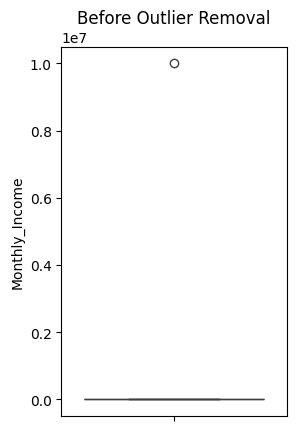

In [14]:
# Before removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=salary_data, y='Monthly_Income')
plt.title('Before Outlier Removal')

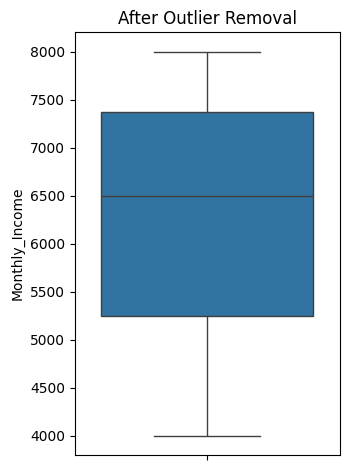

In [16]:
# After removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_data, y='Monthly_Income')
plt.title('After Outlier Removal')
plt.tight_layout()
plt.show()

In [19]:
 {
    "Mean": mean_income,
    "Median": median_income,
    "Mode": mode_income,
    "25th Percentile": q25,
    "50th Percentile": q50,
    "75th Percentile": q75,
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound,
    "Outliers": outliers,
    "Cleaned Dataset": cleaned_data
}

{'Mean': np.float64(1433928.5714285714),
 'Median': 7000.0,
 'Mode': np.int64(4000),
 '25th Percentile': np.float64(5500.0),
 '50th Percentile': np.float64(7000.0),
 '75th Percentile': np.float64(7750.0),
 'Lower Bound': np.float64(2125.0),
 'Upper Bound': np.float64(11125.0),
 'Outliers':         Name  Monthly_Income
 6  Elon Musk        10000000,
 'Cleaned Dataset':     Name  Monthly_Income
 0    Rob            5000
 1  Rafiq            6000
 2   Nina            4000
 3  Sofia            7500
 4  Mohan            8000
 5    Tao            7000}